In [218]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
import warnings

In [219]:
warnings.filterwarnings(action = 'ignore')
plt.rc('font',family = 'malgun gothic')

### 랜덤 포레스트(Random Forest)는 의사결정나무(Decision Tree)를 여러 개 결합한 앙상블(Ensemble) 학습 방법 중 하나입니다.

### 랜덤 포레스트는 일반적으로 다음과 같은 방식으로 동작합니다.

##### 1. 데이터 샘플링

* 원래 데이터셋에서 무작위로 데이터를 추출하여 새로운 데이터셋을 생성합니다.
* 이 때 추출되는 데이터는 중복될 수 있으며, 추출 비율은 전체 데이터셋에서 일부만 추출하는 부분 샘플링(Bootstrap sampling) 방식을 사용합니다.

##### 2. 변수 샘플링

* 의사결정나무를 학습할 때, 모든 변수를 고려할 경우, 과적합(Overfitting) 문제가 발생할 수 있습니다.
* 따라서, 일부 변수만을 선택하여 학습하는 것이 필요합니다.
* 무작위로 변수를 선택하는 방식으로, 변수 샘플링(Feature sampling)을 수행합니다.

##### 3.의사결정나무 생성

* 데이터 샘플링과 변수 샘플링이 완료되면, 의사결정나무를 생성합니다.
* 의사결정나무는 특정 변수를 기준으로 데이터를 분할하는 분기 기준을 찾아내는 방식으로 학습됩니다.
* 분기 기준을 찾는 과정은 모든 변수 중에서 가장 좋은 분기 기준을 찾아내는 방식으로 이루어집니다.

##### 4. 앙상블

* 데이터 샘플링, 변수 샘플링, 의사결정나무 생성을 반복하여 여러 개의 의사결정나무를 생성합니다.
* 이렇게 생성된 의사결정나무들을 모두 결합하여 예측 결과를 도출합니다.
* 분류 문제에서는 각 의사결정나무의 예측 결과를 다수결 방식으로, 회귀 문제에서는 각 의사결정나무의 예측 결과의 평균값을 구하여 최종 예측 결과를 도출합니다.
* 랜덤 포레스트는 의사결정나무의 단점인 과적합 문제를 해결하면서도 높은 예측 성능을 보입니다. 또한 변수의 중요도를 계산하여, 데이터 분석에 대한 인사이트를 제공합니다.

# Random Forest 실습 

### 사용한 데이터 셋 : Heart Attack Analysis & Prediction Dataset
* 출처 : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [220]:
df = pd.read_csv('C:/Users/whileduck/Desktop/code/dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Hyperparmeter 추정 전 테스트 결과 

In [221]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('output',axis = 1), df['output'], test_size = 0.2 , random_state= 42)

In [252]:
model  = RandomForestClassifier() # 모델 생성 후 피팅 
model.fit(x_train,y_train)

RandomForestClassifier()

민감도 : 0.8524590163934426|정확도 : 0.8484848484848485|Recall : 0.875


Text(0.5, 1.0, '기본 파라미터 추정 혼돈 행렬')

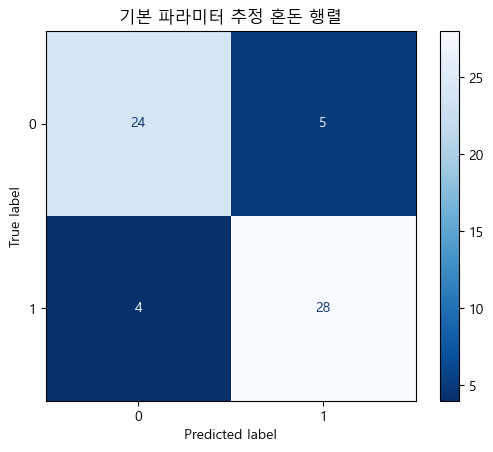

In [253]:
pred = model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
pre_score = precision_score(y_test,pred)
recall = recall_score(y_test,pred)

print(f'민감도 : {acc_score}', f'정확도 : {pre_score}',f'Recall : {recall}', sep = '|') 

plot_confusion_matrix(model,x_test,y_test, cmap= 'Blues_r')
plt.title('기본 파라미터 추정 혼돈 행렬')

# 단일 파라미터 추정 

* for 문을 이용하여 max depth 파라미터 설정에 따라 평균 점수를 avg_score 에 담아줍니다.

In [227]:
dephts = range(1,26)

avg_score = {}

for depth in tqdm(dephts):
    
    model = RandomForestClassifier(max_depth= depth)
    
    avg_score[depth] = np.mean(cross_val_score(model,x_train,y_train, cv = 10))
    

100%|██████████| 25/25 [00:21<00:00,  1.14it/s]


Text(0.5, 1.0, 'Best Depth is 16 \n score : 0.83')

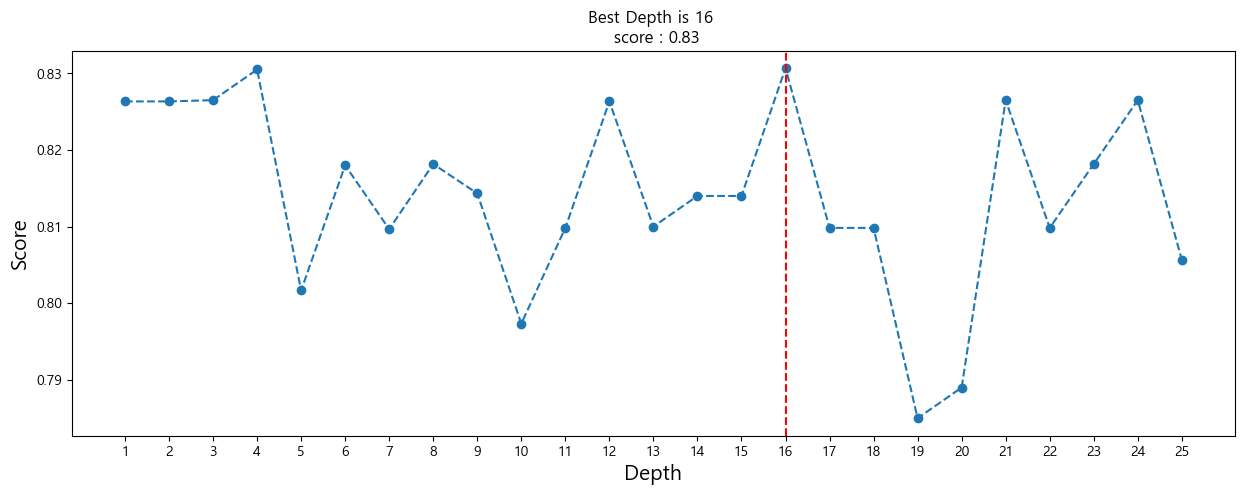

In [231]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,26))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best Depth is {idx} \n score : {round(avg_score[idx],2)}')

* 단일 파라미터인 max depth 에 값에 따라 바뀌는 score 점수를 찾았습니다. 
* 하지만 랜덤 포레스트의 하이퍼 파라미터는 수도 없이 정말 많기 때문에 하나의 파라미터만으로 최적이라 할 수 없습니다.
* 예를 들어 gini 계수로 depth 를 구하는 것과, entropy 로 구하는 것은 분명 다른 점수를 보일 것입니다.

In [235]:
dephts = range(1,26)

gini_avg_score = {}
entropy_avg_score = {}

for depth in tqdm(dephts):
    
    gini_model = RandomForestClassifier(criterion='gini',max_depth= depth)
    entrypy_model = RandomForestClassifier(criterion='entropy',max_depth= depth)
    
    gini_avg_score[depth] = np.mean(cross_val_score(gini_model,x_train,y_train, cv = 10))
    entropy_avg_score[depth] = np.mean(cross_val_score(gini_model,x_train,y_train, cv = 10))

100%|██████████| 25/25 [00:43<00:00,  1.75s/it]


Text(0.5, 1.0, 'different of best Depth according to critertion(Gini,Entropy)')

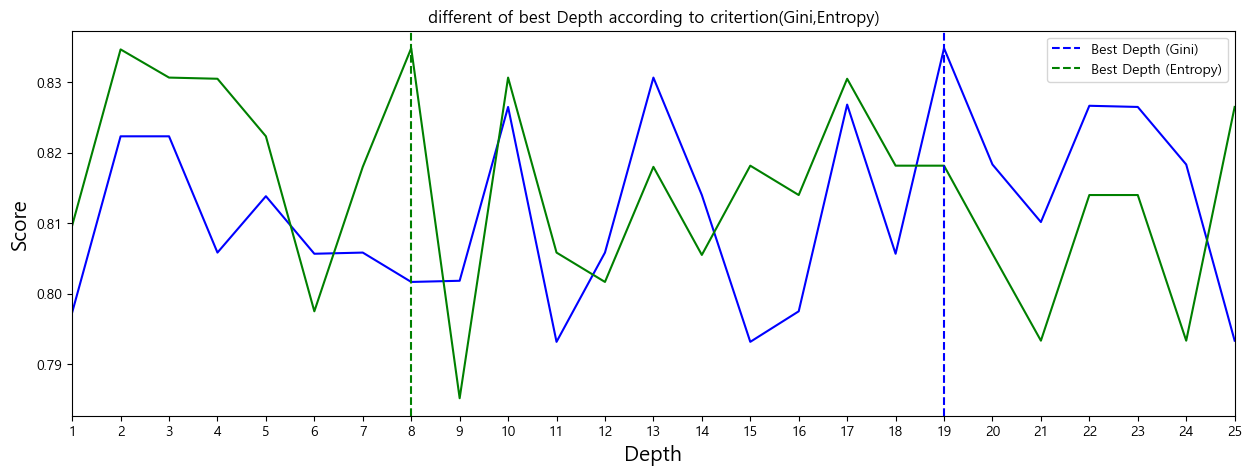

In [242]:
plt.figure(figsize = [15,5])

gini_idx = max(gini_avg_score, key = gini_avg_score.get)
entropy_idx = max(entropy_avg_score, key = entropy_avg_score.get)

plt.plot(gini_avg_score.keys(), gini_avg_score.values(),c = 'b')
plt.plot(entropy_avg_score.keys(), entropy_avg_score.values(),c = 'g')

plt.axvline(gini_idx, ls = '--', c = 'b', label = 'Best Depth (Gini)')
plt.axvline(entropy_idx, ls = '--', c = 'g', label = 'Best Depth (Entropy)')


plt.xticks(ticks = range(1,26))
plt.xlim([1,25])

plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})

plt.legend()  
plt.title("different of best Depth according to critertion(Gini,Entropy)")


### 이것과 같이, 분류 기준을 Gini 계수로 하느냐, entropy 로 하느냐에 따라서 최적의 파라미터는 달라집니다.
### 또한, 한 번의 검증으로 최적의 파라미터를 찾는 Hold out 검증 방법은 추정된 파라미터의 신뢰도가 Cross validation 에 비해 부족합니다 

## Cross Valudation 의 필요성

##### 1 .과적합 방지

* 모델이 학습 데이터에만 잘 동작하고, 새로운 데이터에 대해서는 일반화 성능이 낮아지는 과적합(Overfitting) 문제를 방지할 수 있습니다.
* 교차 검증을 통해 모델의 성능을 여러번 평가하고 평균을 내어 일반화 성능을 측정할 수 있습니다.

##### 2. 데이터 효율성

* 교차 검증을 사용하면, 모든 데이터셋을 학습에 사용할 수 있습니다.
* 기존의 데이터 분리 방법은 학습, 검증, 테스트 데이터로 나누어서 사용하는 방식이기 때문에, 학습 데이터의 양이 적을 수 있습니다.
* 하지만, 교차 검증을 사용하면, 데이터를 모두 학습에 사용할 수 있기 때문에 모델의 성능이 향상될 수 있습니다.

##### 3.모델 선택

* 교차 검증을 통해 여러 모델의 성능을 비교할 수 있습니다.
* 여러 가지 모델을 만들어서 교차 검증을 수행하면, 각 모델의 성능을 비교하여 가장 좋은 모델을 선택할 수 있습니다.

##### 4.신뢰성

* 교차 검증을 여러 번 반복하면, 검증 결과의 분산이 줄어들기 때문에 결과의 신뢰성이 높아집니다.
* 검증 결과에 대한 신뢰성이 높아지면, 모델의 성능을 더 정확하게 예측할 수 있습니다.

# Grid Search 의 필요성 

##### 1. 최적의 하이퍼파라미터를 찾을 수 있습니다.

* 기계학습 모델에서 하이퍼파라미터는 모델의 성능에 직접적으로 영향을 미치기 때문에, 적절한 하이퍼파라미터를 찾는 것이 매우 중요합니다.
* 그리드 서치는 가능한 모든 하이퍼파라미터 조합을 시도하여 최적의 조합을 찾을 수 있습니다.
* 모델의 성능을 개선할 수 있습니다.

##### 2. 적절한 하이퍼파라미터를 설정하지 않으면 모델의 성능이 낮아질 수 있습니다.

* 그리드 서치를 사용하여 최적의 하이퍼파라미터를 찾으면 모델의 성능을 개선할 수 있습니다.
* 더 많은 하이퍼파라미터를 시도할 수 있습니다.

##### 3. 하이퍼파라미터가 많을수록 최적의 조합을 찾는 것이 어려워집니다.

* 그러나 그리드 서치를 사용하면 가능한 모든 조합을 시도할 수 있기 때문에 더 많은 하이퍼파라미터를 시도할 수 있습니다.
* 모델의 일반화 성능을 높일 수 있습니다.

##### 4. 그리드 서치를 사용하여 최적의 하이퍼파라미터를 찾으면, 일반화 성능이 향상됩니다.
* 최적의 하이퍼파라미터를 사용하면 모델이 새로운 데이터에 대해서도 잘 동작할 수 있습니다.

* 방금 Hold out 으로 검증한 Depth 의 파라미터 값은 12개였지만, 교차검증을 통해 얻은 Depth 파라미터는 18과 3이였으며, 
* Critertion 에 따라 파라미터의 값이 다릅니다.

* 이에 따라 Hold out 검증 방법보다 Cross Validation 을 통해 파라미터 추정의 정확도와 신뢰성을 높혀주고
* 다양한 파라미터를 조합할 수 있는 Grid Search 방식을 이용해 최적의 하이퍼 파라미터를 추정해야 합니다.

# Grid Search 로 하이퍼 파라미터 추정하기 

In [244]:
model = RandomForestClassifier()
print(model.estimator_params) #설정 할 수 있는 parameter 종류들은 다음과 같다.

('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha')


* GridSearch 할 parameter 들을 parm_grid 에 dictionary 형태로 저장 

In [245]:
param_grid = {'criterion':['gini','entropy'],
               'n_estimators':[50,80,100],
               'max_depth' : range(1,21,5),
                'max_leaf_nodes' : [30,40,50],
                'max_features' : ['auto','sqrt','log2']}


grid_rf = GridSearchCV(estimator = model, param_grid= param_grid, verbose= 1 ,cv = 10, n_jobs= -1) #위에서 setting 한 parameter 종류로 crossvalidation 예정 
grid_rf.fit(x_train,y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [30, 40, 50],
                         'n_estimators': [50, 80, 100]},
             verbose=1)

In [246]:
result = pd.DataFrame(grid_rf.cv_results_)

display(result[['params','mean_test_score']].sort_values(by = 'mean_test_score',ascending= False))

print('--' * 40)

print(grid_rf.best_params_) # 최적의 parameter print

,params,mean_test_score
197,"{'criterion': 'entropy', 'max_depth': 16, 'max...",0.843000
4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.843000
57,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.839000
156,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.839000
105,"{'criterion': 'gini', 'max_depth': 16, 'max_fe...",0.838667
...,...,...
15,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.789167
114,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.789000
40,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.781000
27,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.780833


--------------------------------------------------------------------------------
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 40, 'n_estimators': 80}


In [251]:
grid_model = grid_rf.best_estimator_ #최적의 파라미터를 가진 모델을 생성

grid_model.fit(x_train,y_train)

grid_pred = grid_model.predict(x_test)

### 튜닝 전 후 model 의 점수 비교 

In [260]:
result = pd.DataFrame({'모델':['튜닝전_랜덤포레스트','튜닝후_랜덤포레스트'],
                        '민감도':[acc_score,grid_acc_score],
                            '정확도':[pre_score,grid_pre_score],
                                '리콜':[recall,grid_recall]})

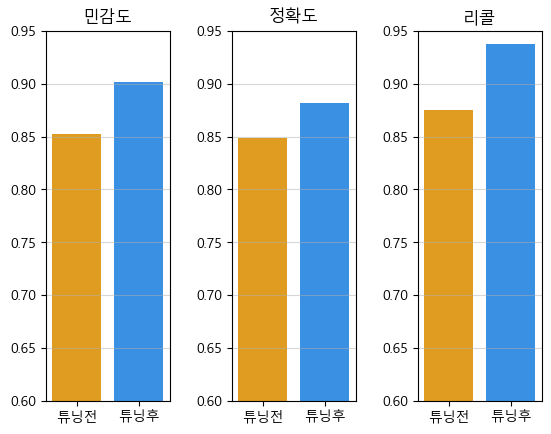

In [281]:
cols = result.columns.tolist()[1:]
plt.subplots_adjust(wspace= 0.5)

for i,var in enumerate(cols):
    
    plt.subplot(1,3,i+1)
    
    sns.barplot(data = result,
                 x = '모델',
                 y = var,
                 palette = ['orange','dodgerblue'])
    plt.grid(True,axis = 'y', alpha = 0.5)
    
    plt.title(var)
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(ticks = [0,1], labels = ['튜닝전','튜닝후'])
    plt.yticks(ticks = np.arange(0.6,1,0.05))
    plt.ylim([0.6,0.95])

Text(0.5, 1.0, '튜닝 후 혼돈행렬')

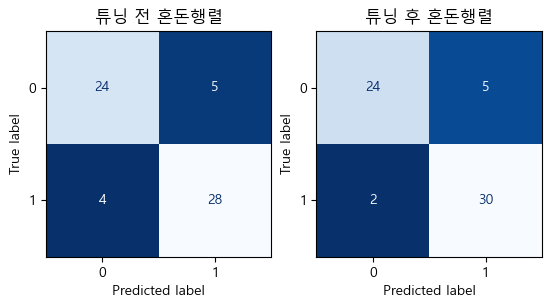

In [290]:
fig,axes = plt.subplots(ncols=2)

plot_confusion_matrix(model,x_test,y_test, cmap= 'Blues_r',colorbar= False,
                      ax = axes[0])
axes[0].set_title('튜닝 전 혼돈행렬')

plot_confusion_matrix(grid_model,x_test,y_test, cmap= 'Blues_r',colorbar= False,
                      ax = axes[1])
axes[1].set_title('튜닝 후 혼돈행렬')

### 확연하게 튜닝 전의 모델보다, 튜닝 후의 모델이 성능이 더 뛰어난 모습을 볼 수 있습니다.

# Feature Importance 확인 

* 랜덤 포레스트(Random Forest)는 여러 개의 의사 결정 트리(Decision Tree)를 조합한 앙상블 기법으로, 각각의 트리에서 추출된 결과를 평균 또는 다수결 등의 방법으로 종합하여 예측 결과를 도출합니다.랜덤 포레스트에서는 각 feature(변수)가 모델 예측에 얼마나 중요한 역할을 하는지를 측정하여 Feature Importance를 계산할 수 있습니다.

* Feature Importance는 특정 feature(변수)가 예측 모델의 결과에 미치는 영향력의 크기를 나타내는 지표입니다. 랜덤 포레스트에서 Feature Importance는 각 feature(변수)가 분류(classification)나 회귀(regression)에서 얼마나 많이 사용되었는지를 기반으로 계산됩니다. 이를 계산하기 위해, 랜덤 포레스트에서는 각 feature(변수)를 무작위로 선택하고 해당 feature(변수)를 사용하여 의사 결정 트리를 생성합니다. 이 과정을 반복하여 생성된 모든 의사 결정 트리에서 각 feature(변수)가 선택된 횟수를 계산하고, 이를 Feature Importance로 사용합니다.

* 랜덤 포레스트에서 Feature Importance를 계산하는 방법은 다양하지만, 가장 일반적으로 사용되는 방법은 Gini Importance입니다. Gini Importance는 의사 결정 트리에서 사용된 분할 기준 중에서 가장 좋은 분할 기준을 선택하는 데 사용되는 지니 계수(Gini coefficient)를 기반으로 Feature Importance를 계산합니다. 각 feature(변수)에서 사용된 분할 기준의 지니 계수를 합산하여, 각 feature(변수)의 중요도를 계산합니

Text(0.5, 1.0, 'Feature Importance')

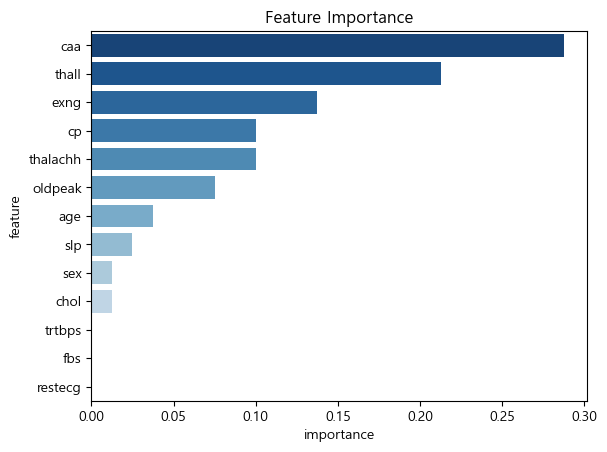

In [298]:
cols = x_train.columns.tolist()

importance = pd.DataFrame({'feature': cols,
                'importance':grid_model.feature_importances_}).sort_values(by = 'importance',ascending = False)


sns.barplot(data = importance,
            y = 'feature',
            x = 'importance',
            palette = 'Blues_r')
plt.title('Feature Importance')